In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/AugmentedAlzheimerDataset/LMCI/728eca3c-29c9-4b9d-8a1e-e1ba345d96bc.jpg
/kaggle/input/AugmentedAlzheimerDataset/LMCI/cfd384b8-fd90-44f2-83b5-cfc8b9b7e6c1.jpg
/kaggle/input/AugmentedAlzheimerDataset/LMCI/ea4a4c3e-a987-444c-8e7c-86721522faf9.jpg
/kaggle/input/AugmentedAlzheimerDataset/LMCI/e80f64aa-fded-4e27-bf51-66adfd10fa7a.jpg
/kaggle/input/AugmentedAlzheimerDataset/LMCI/377a8061-d1b9-43ac-90d7-1251177ad998.jpg
/kaggle/input/AugmentedAlzheimerDataset/LMCI/a7b184c5-b1fb-47fe-a049-a5843b11a6b0.jpg
/kaggle/input/AugmentedAlzheimerDataset/LMCI/471aee5b-73c0-4078-b1a7-84456943c3f0.jpg
/kaggle/input/AugmentedAlzheimerDataset/LMCI/1a98e7b1-699e-402c-baee-eff1478a695e.jpg
/kaggle/input/AugmentedAlzheimerDataset/LMCI/319d5878-e6d9-45ec-9024-9f99aa8ae9f3.jpg
/kaggle/input/AugmentedAlzheimerDataset/LMCI/8e2f4776-0ae6-4a7e-b67b-dea44f265587.jpg
/kaggle/input/AugmentedAlzheimerDataset/LMCI/74a72fa8-3fcf-4c1f-a7ea-a643fd7a18b8.jpg
/kaggle/input/AugmentedAlzheimerDataset/LMCI/7668f60a-

In [29]:
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras
from keras.callbacks import EarlyStopping,ModelCheckpoint
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from tqdm import tqdm
from imblearn.over_sampling import SMOTE

In [37]:
images = []
labels = []
data_path = '/kaggle/input/AugmentedAlzheimerDataset/'
for i in os.listdir(data_path):
    path = os.path.join(data_path+'/'+i)
    for j in os.listdir(path):
        p = os.path.join(path+'/'+j)
        images.append(p)
        labels.append(i)
df = pd.DataFrame({'image': images, 'label': labels})
df

image label
0      /kaggle/input/AugmentedAlzheimerDataset//LMCI/...  LMCI
1      /kaggle/input/AugmentedAlzheimerDataset//LMCI/...  LMCI
2      /kaggle/input/AugmentedAlzheimerDataset//LMCI/...  LMCI
3      /kaggle/input/AugmentedAlzheimerDataset//LMCI/...  LMCI
4      /kaggle/input/AugmentedAlzheimerDataset//LMCI/...  LMCI
...                                                  ...   ...
33979  /kaggle/input/AugmentedAlzheimerDataset//CN/f9...    CN
33980  /kaggle/input/AugmentedAlzheimerDataset//CN/12...    CN
33981  /kaggle/input/AugmentedAlzheimerDataset//CN/de...    CN
33982  /kaggle/input/AugmentedAlzheimerDataset//CN/a6...    CN
33983  /kaggle/input/AugmentedAlzheimerDataset//CN/7b...    CN

[33984 rows x 2 columns]

In [38]:
import cv2


def apply_median_filter(image_path):
    image = cv2.imread(image_path)

    filtered_image = cv2.medianBlur(image, 5)

    return filtered_image

df['filtered_image'] = df['image'].apply(apply_median_filter)

df


image label  \
0      /kaggle/input/AugmentedAlzheimerDataset//LMCI/...  LMCI   
1      /kaggle/input/AugmentedAlzheimerDataset//LMCI/...  LMCI   
2      /kaggle/input/AugmentedAlzheimerDataset//LMCI/...  LMCI   
3      /kaggle/input/AugmentedAlzheimerDataset//LMCI/...  LMCI   
4      /kaggle/input/AugmentedAlzheimerDataset//LMCI/...  LMCI   
...                                                  ...   ...   
33979  /kaggle/input/AugmentedAlzheimerDataset//CN/f9...    CN   
33980  /kaggle/input/AugmentedAlzheimerDataset//CN/12...    CN   
33981  /kaggle/input/AugmentedAlzheimerDataset//CN/de...    CN   
33982  /kaggle/input/AugmentedAlzheimerDataset//CN/a6...    CN   
33983  /kaggle/input/AugmentedAlzheimerDataset//CN/7b...    CN   

                                          filtered_image  
0      [[[12, 12, 12], [12, 12, 12], [12, 12, 12], [1...  
1      [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...  
2      [[[15, 15, 15], [15, 15, 15], [15, 15, 15], [1...  
3      [[[16, 17, 15], [16, 17, 15], [16, 17, 15], [1...  
4      [[[0, 2, 7], [0, 2, 7], [0, 2, 7], [0, 2, 7], ...  
...                                                  ...  
33979  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...  
33980  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...  
33981  [[[13, 13, 13], [13, 13, 13], [13, 13, 13], [1...  
33982  [[[15, 7, 0], [15, 7, 0], [15, 7, 0], [15, 7, ...  
33983  [[[6, 0, 11], [6, 0, 11], [6, 0, 11], [6, 0, 1...  

[33984 rows x 3 columns]

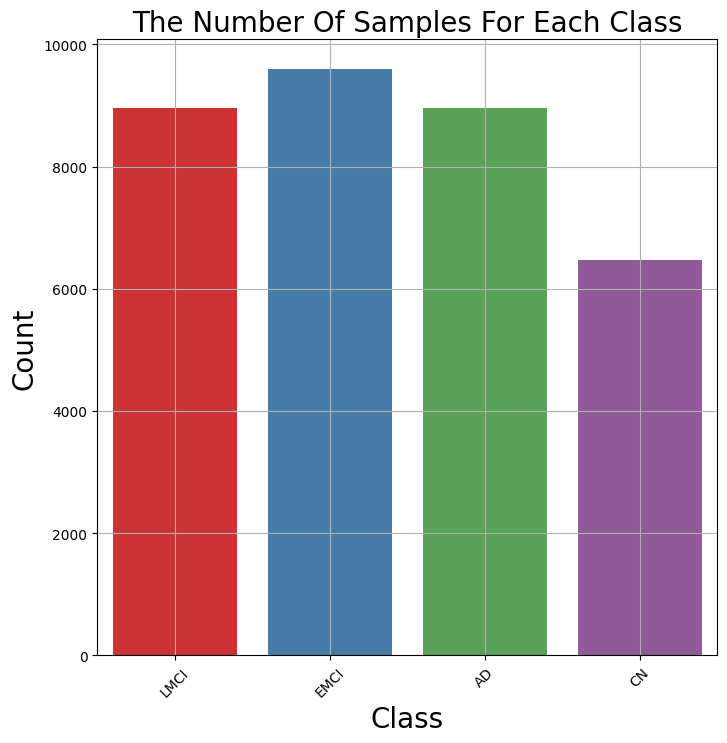

In [39]:
plt.figure(figsize=(8,8))
ax = sns.countplot(x=df.label,palette='Set1')
ax.set_xlabel("Class",fontsize=20)
ax.set_ylabel("Count",fontsize=20)
plt.title('The Number Of Samples For Each Class',fontsize=20)
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

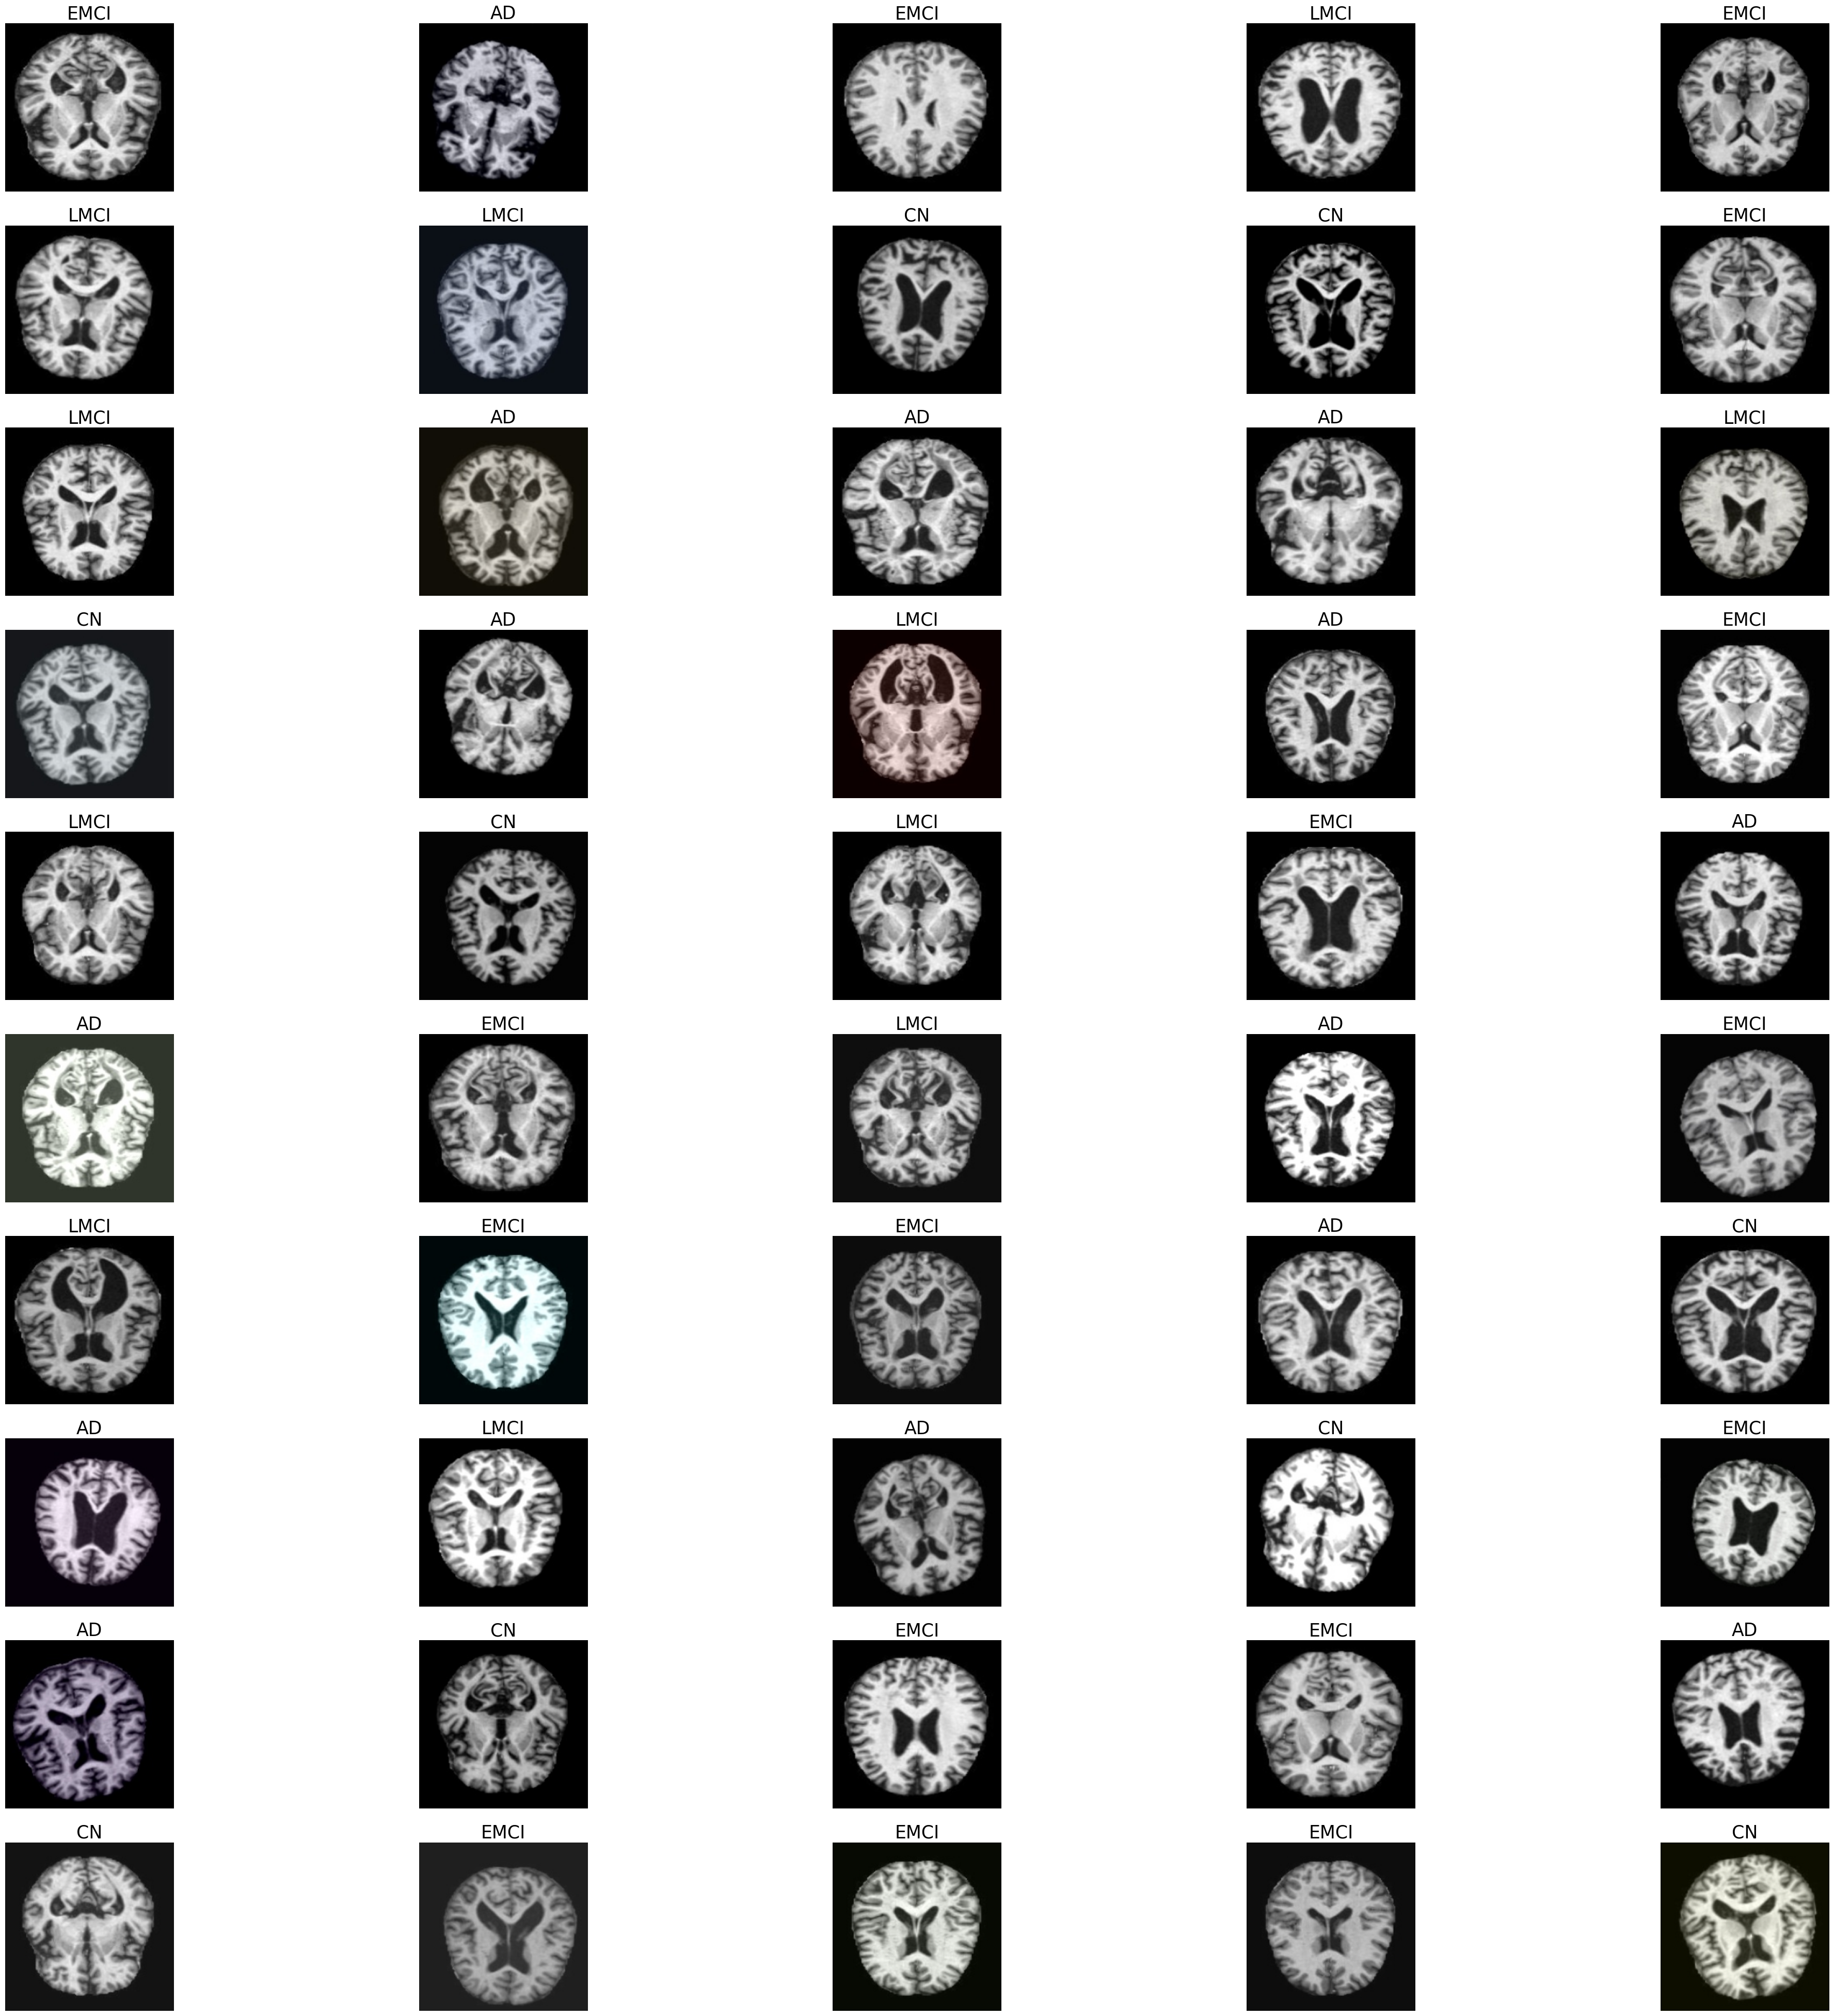

In [40]:
plt.figure(figsize=(50,50))
for n,i in enumerate(np.random.randint(0,len(df),50)):
    plt.subplot(10,5,n+1)
    img=cv2.imread(df.image[i])
    img=cv2.resize(img,(224,224))
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')
    plt.title(df.label[i],fontsize=25)
    

In [41]:
X_train, X_test1, y_train, y_test1 = train_test_split(df['image'], df['label'], test_size=0.2, random_state=42,shuffle=True,stratify=df['label'])
X_val, X_test, y_val, y_test = train_test_split(X_test1,y_test1, test_size=0.5, random_state=42,shuffle=True,stratify=y_test1)
df_train = pd.DataFrame({'image': X_train, 'label': y_train})
df_test = pd.DataFrame({'image': X_test, 'label': y_test})
df_val = pd.DataFrame({'image': X_val, 'label': y_val})

In [11]:
image_size = (224,224)
batch_size = 32
datagen = ImageDataGenerator(
    preprocessing_function= tf.keras.applications.resnet.preprocess_input,
    rescale=1./255,
    horizontal_flip=True
)
train_generator = datagen.flow_from_dataframe(
    df_train,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)
test_generator = datagen.flow_from_dataframe(
    df_test,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)
val_generator = datagen.flow_from_dataframe(
    df_val,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

Found 27187 validated image filenames belonging to 4 classes.

Found 3399 validated image filenames belonging to 4 classes.

Found 3398 validated image filenames belonging to 4 classes.


In [12]:
class_num=list(train_generator.class_indices.keys())
class_num

['AD', 'CN', 'EMCI', 'LMCI']

In [13]:
model=(tf.keras.applications.VGG16(input_shape=(224,224,3),include_top=False, weights='imagenet'))
model.layers[0].trainable = False
model.summary()


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ ?                      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [16]:
checkpoint_cb =ModelCheckpoint("model_VGG16.keras", save_best_only=True)
early_stopping_cb =EarlyStopping(patience=10, restore_best_weights=True)
model.compile(optimizer ='adam', loss='categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(train_generator, epochs=18, batch_size=128,validation_data=val_generator, callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/18


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.

  self._warn_if_super_not_called()


  1/850 ━━━━━━━━━━━━━━━━━━━━ 8:54:03 38s/step - accuracy: 0.2500 - loss: 1.7211


I0000 00:00:1712485759.310614      92 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.

W0000 00:00:1712485759.335267      92 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


829/850 ━━━━━━━━━━━━━━━━━━━━ 3s 150ms/step - accuracy: 0.6642 - loss: 0.8501

W0000 00:00:1712485883.584126      93 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


850/850 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - accuracy: 0.6660 - loss: 0.8448

W0000 00:00:1712485887.808744      93 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update

W0000 00:00:1712485909.315932      92 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


850/850 ━━━━━━━━━━━━━━━━━━━━ 188s 177ms/step - accuracy: 0.6661 - loss: 0.8446 - val_accuracy: 0.8643 - val_loss: 0.3386

Epoch 2/18

850/850 ━━━━━━━━━━━━━━━━━━━━ 122s 143ms/step - accuracy: 0.8441 - loss: 0.3871 - val_accuracy: 0.8911 - val_loss: 0.2736

Epoch 3/18

850/850 ━━━━━━━━━━━━━━━━━━━━ 122s 143ms/step - accuracy: 0.8920 - loss: 0.2794 - val_accuracy: 0.9264 - val_loss: 0.1985

Epoch 4/18

850/850 ━━━━━━━━━━━━━━━━━━━━ 122s 143ms/step - accuracy: 0.9197 - loss: 0.2111 - val_accuracy: 0.9191 - val_loss: 0.1906

Epoch 5/18

850/850 ━━━━━━━━━━━━━━━━━━━━ 122s 143ms/step - accuracy: 0.9313 - loss: 0.1819 - val_accuracy: 0.9482 - val_loss: 0.1426

Epoch 6/18

850/850 ━━━━━━━━━━━━━━━━━━━━ 122s 142ms/step - accuracy: 0.9407 - loss: 0.1623 - val_accuracy: 0.9444 - val_loss: 0.1506

Epoch 7/18

850/850 ━━━━━━━━━━━━━━━━━━━━ 122s 143ms/step - accuracy: 0.9532 - loss: 0.1283 - val_accuracy: 0.9609 - val_loss: 0.1095

Epoch 8/18

850/850 ━━━━━━━━━━━━━━━━━━━━ 122s 143ms/step - accuracy: 0.959

In [17]:
hist_=pd.DataFrame(hist.history)
hist_

accuracy      loss  val_accuracy  val_loss
0   0.740207  0.634923      0.864332  0.338607
1   0.854195  0.366816      0.891112  0.273621
2   0.893699  0.273765      0.926427  0.198530
3   0.917093  0.222347      0.919070  0.190557
4   0.931732  0.181084      0.948205  0.142569
5   0.940854  0.162323      0.944379  0.150557
6   0.950896  0.136746      0.960859  0.109483
7   0.955199  0.128019      0.964097  0.112526
8   0.960091  0.110141      0.959976  0.105262
9   0.964321  0.098682      0.964391  0.099691
10  0.969066  0.091140      0.974985  0.078227
11  0.971678  0.080694      0.969394  0.094513
12  0.973664  0.076376      0.976457  0.076254
13  0.976570  0.067758      0.972337  0.087406
14  0.974951  0.071001      0.979105  0.068174
15  0.978593  0.060459      0.970865  0.080643
16  0.979696  0.058685      0.970277  0.099686
17  0.980138  0.057741      0.971160  0.077115

In [ ]:
from tensorflow.keras.models import load_model
model=load_model('/content/model_VGG16.h5')
features = model.predict(train_generator)

Epoch 1/23

850/850 ━━━━━━━━━━━━━━━━━━━━ 127s 145ms/step - accuracy: 0.6006 - loss: 1.1305 - val_accuracy: 0.8058 - val_loss: 0.4845

Epoch 2/23


W0000 00:00:1712488445.920536      92 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


850/850 ━━━━━━━━━━━━━━━━━━━━ 121s 141ms/step - accuracy: 0.7832 - loss: 0.5079 - val_accuracy: 0.8484 - val_loss: 0.3954

Epoch 3/23

850/850 ━━━━━━━━━━━━━━━━━━━━ 121s 141ms/step - accuracy: 0.8261 - loss: 0.4174 - val_accuracy: 0.8434 - val_loss: 0.4026

Epoch 4/23

850/850 ━━━━━━━━━━━━━━━━━━━━ 121s 141ms/step - accuracy: 0.8422 - loss: 0.3730 - val_accuracy: 0.8128 - val_loss: 0.4391

Epoch 5/23

850/850 ━━━━━━━━━━━━━━━━━━━━ 121s 141ms/step - accuracy: 0.8792 - loss: 0.3042 - val_accuracy: 0.8637 - val_loss: 0.3278

Epoch 6/23

850/850 ━━━━━━━━━━━━━━━━━━━━ 121s 141ms/step - accuracy: 0.8836 - loss: 0.2910 - val_accuracy: 0.8888 - val_loss: 0.2695

Epoch 7/23

850/850 ━━━━━━━━━━━━━━━━━━━━ 121s 141ms/step - accuracy: 0.9052 - loss: 0.2379 - val_accuracy: 0.8570 - val_loss: 0.3502

Epoch 8/23

850/850 ━━━━━━━━━━━━━━━━━━━━ 121s 141ms/step - accuracy: 0.9052 - loss: 0.2320 - val_accuracy: 0.8991 - val_loss: 0.2473

Epoch 9/23

850/850 ━━━━━━━━━━━━━━━━━━━━ 142s 142ms/step - accuracy: 0.925

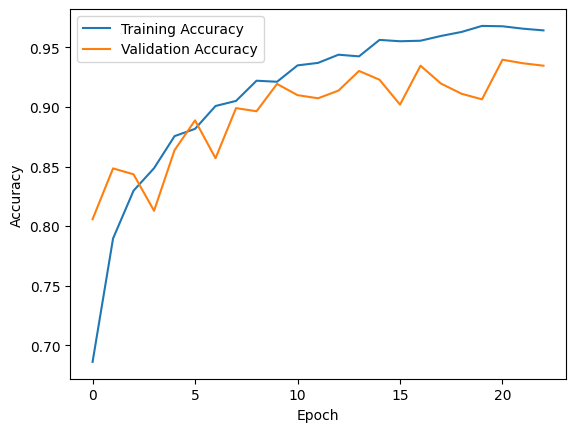

In [21]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load pre-trained VGG16 model without the top (fully connected) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the convolutional base
base_model.trainable = False

# Add new classifier layers on top
flatten_layer = Flatten()(base_model.output)
dense_layer = Dense(256, activation='relu')(flatten_layer)
output_layer = Dense(4, activation='softmax')(dense_layer)  # Assuming num_classes is defined

# Create the transfer learning model
transfer_model = Model(inputs=base_model.input, outputs=output_layer)

# Compile the model
transfer_model.compile(optimizer=Adam(),
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

history = transfer_model.fit(train_generator, epochs=23, validation_data=val_generator)


# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
transfer_model.save('model_VGG16.h5')

In [22]:
transfer_model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,986,126 (129.65 MB)

 Trainable params: 6,423,812 (24.50 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 12,847,626 (49.01 MB)

In [23]:
from sklearn.metrics import classification_report



# Predict on test data
predictions = transfer_model.predict(test_generator)

# Convert predictions from one-hot encoded to class labels
predicted_labels = [np.argmax(pred) for pred in predictions]

# Get true labels from test generator
true_labels = test_generator.classes

# Map class indices to class labels
class_labels = list(test_generator.class_indices.keys())

# Generate classification report
report = classification_report(true_labels, predicted_labels, target_names=class_labels)

print(report)


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.

  self._warn_if_super_not_called()


107/107 ━━━━━━━━━━━━━━━━━━━━ 23s 211ms/step

              precision    recall  f1-score   support



          AD       0.98      0.95      0.96       896

          CN       1.00      1.00      1.00       647

        EMCI       0.85      0.96      0.90       960

        LMCI       0.95      0.84      0.89       896



    accuracy                           0.93      3399

   macro avg       0.94      0.94      0.94      3399

weighted avg       0.94      0.93      0.93      3399




W0000 00:00:1712491154.568690      93 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update



94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

Epoch 1/16

850/850 ━━━━━━━━━━━━━━━━━━━━ 127s 129ms/step - accuracy: 0.4061 - loss: 2.1812 - val_accuracy: 0.5306 - val_loss: 1.0089

Epoch 2/16

850/850 ━━━━━━━━━━━━━━━━━━━━ 92s 107ms/step - accuracy: 0.5268 - loss: 1.0292 - val_accuracy: 0.5906 - val_loss: 0.8891

Epoch 3/16

850/850 ━━━━━━━━━━━━━━━━━━━━ 93s 109ms/step - accuracy: 0.5653 - loss: 0.9433 - val_accuracy: 0.5241 - val_loss: 0.9920

Epoch 4/16

850/850 ━━━━━━━━━━━━━━━━━━━━ 91s 106ms/step - accuracy: 0.5604 - loss: 0.9599 - val_accuracy: 0.5865 - val_loss: 0.8979

Epoch 5/16

850/850 ━━━━━━━━━━━━━━━━━━━━ 92s 108ms/step - accuracy: 0.5793 - loss: 0.9107 - val_accuracy: 0.6162 - val_loss: 0.8401

Epoch 6/16

850/850 ━━━━━━━━━━━━━━━━━━━━ 91s 107ms/step - accuracy: 0.6081 - loss: 0.8619 - val_accuracy: 0.6495 - val_loss: 0.7729

Epoch 7/16

850/850 ━━━━━━━━━━━━━━━━━━━━ 93s 109ms/step - accuracy: 0.6213 - loss: 0.8297 - val_accuracy: 0.6298 - val_loss: 0.7896

Epoch 8/16

850

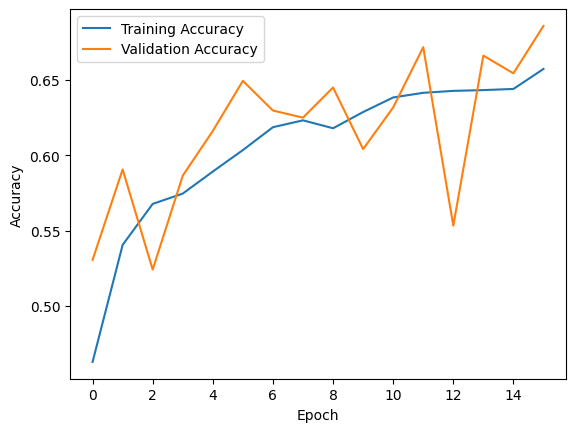

In [24]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load pre-trained ResNet50 model without the top (fully connected) layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the convolutional base
base_model.trainable = False

# Add new classifier layers on top
flatten_layer = Flatten()(base_model.output)
dense_layer = Dense(256, activation='relu')(flatten_layer)
output_layer = Dense(4, activation='softmax')(dense_layer)  
# Create the transfer learning model
transfer_model_2 = Model(inputs=base_model.input, outputs=output_layer)

# Compile the model
transfer_model_2.compile(optimizer=Adam(),
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

history = transfer_model_2.fit(train_generator, epochs=16, validation_data=val_generator)

# Plot training history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [25]:
from sklearn.metrics import classification_report


# Predict on test data
predictions = transfer_model_2.predict(test_generator)

# Convert predictions from one-hot encoded to class labels
predicted_labels = [np.argmax(pred) for pred in predictions]

# Get true labels from test generator
true_labels = test_generator.classes

# Map class indices to class labels
class_labels = list(test_generator.class_indices.keys())

# Generate classification report
report = classification_report(true_labels, predicted_labels, target_names=class_labels)

print(report)


107/107 ━━━━━━━━━━━━━━━━━━━━ 25s 197ms/step

              precision    recall  f1-score   support



          AD       0.64      0.73      0.68       896

          CN       0.90      0.98      0.94       647

        EMCI       0.69      0.68      0.69       960

        LMCI       0.54      0.43      0.48       896



    accuracy                           0.69      3399

   macro avg       0.69      0.71      0.70      3399

weighted avg       0.68      0.69      0.68      3399




In [26]:
transfer_model_2.save("model2.h5")

In [27]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get('accuracy') is not None and logs.get('accuracy') > 0.97:
            print("\nAccuracy is high, cancelling training.")
            self.model.stop_training = True

callback = myCallback()


Epoch 1/20


W0000 00:00:1712493282.086327      90 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 61/850 ━━━━━━━━━━━━━━━━━━━━ 16:01 1s/step - accuracy: 0.3809 - loss: 1.4033  

W0000 00:00:1712493355.255289      91 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


850/850 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step - accuracy: 0.6143 - loss: 0.8570

W0000 00:00:1712493538.726460      91 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


850/850 ━━━━━━━━━━━━━━━━━━━━ 385s 329ms/step - accuracy: 0.6144 - loss: 0.8568 - val_accuracy: 0.5400 - val_loss: 1.7430

Epoch 2/20


W0000 00:00:1712493561.699913      92 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


850/850 ━━━━━━━━━━━━━━━━━━━━ 202s 237ms/step - accuracy: 0.8365 - loss: 0.4042 - val_accuracy: 0.5898 - val_loss: 1.6293

Epoch 3/20

850/850 ━━━━━━━━━━━━━━━━━━━━ 200s 235ms/step - accuracy: 0.8947 - loss: 0.2648 - val_accuracy: 0.9099 - val_loss: 0.2239

Epoch 4/20

850/850 ━━━━━━━━━━━━━━━━━━━━ 198s 232ms/step - accuracy: 0.9473 - loss: 0.1469 - val_accuracy: 0.8726 - val_loss: 0.3880

Epoch 5/20

850/850 ━━━━━━━━━━━━━━━━━━━━ 200s 234ms/step - accuracy: 0.9546 - loss: 0.1288 - val_accuracy: 0.8779 - val_loss: 0.4029

Epoch 6/20

850/850 ━━━━━━━━━━━━━━━━━━━━ 199s 233ms/step - accuracy: 0.9677 - loss: 0.0920 - val_accuracy: 0.7893 - val_loss: 0.8595

Epoch 7/20

850/850 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step - accuracy: 0.9712 - loss: 0.0844

Accuracy is high, cancelling training.

850/850 ━━━━━━━━━━━━━━━━━━━━ 200s 234ms/step - accuracy: 0.9712 - loss: 0.0844 - val_accuracy: 0.9532 - val_loss: 0.1136


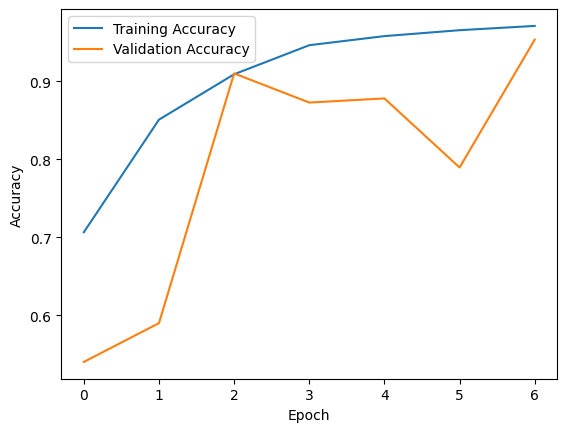

In [29]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D,Dropout,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load pre-trained InceptionV3 model without the top (fully connected) layers
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


# Add new classifier layers on top
x =GlobalAveragePooling2D()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.2)(x)
output_layer = Dense(4, activation='sigmoid')(x)  # Assuming num_classes is defined

# Create the transfer learning model
transfer_model_3 = Model(inputs=base_model.input, outputs=output_layer)

# Compile the model
transfer_model_3.compile(optimizer=Adam(),
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

history = transfer_model_3.fit(train_generator, epochs=20, callbacks=[callback],batch_size=128,validation_data=val_generator)

# Plot training history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [30]:
transfer_model_3.save('model3.h5')

In [31]:
transfer_model_3.summary()

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_94 (Conv2D)  │ (None, 111, 111,  │        864 │ input_layer_5[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 111, 111,  │         96 │ conv2d_94[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_94       │ (None, 111, 111,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_95 (Conv2D)  │ (None, 109, 109,  │      9,216 │ activation_94[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │         96 │ conv2d_95[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_95       │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_96 (Conv2D)  │ (None, 109, 109,  │     18,432 │ activation_95[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │        192 │ conv2d_96[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_96       │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 54, 54,    │          0 │ activation_96[0]… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_97 (Conv2D)  │ (None, 54, 54,    │      5,120 │ max_pooling2d_4[… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 54, 54,    │        240 │ conv2d_97[0][0]   │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_97       │ (None, 54, 54,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_98 (Conv2D)  │ (None, 52, 52,    │    138,240 │ activation_97[0]… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 52, 52,    │        576 │ conv2d_98[0][0]   │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_98       │ (None, 52, 52,    │          0 │ batch_normalizat

 Total params: 66,916,206 (255.27 MB)

 Trainable params: 22,293,924 (85.04 MB)

 Non-trainable params: 34,432 (134.50 KB)

 Optimizer params: 44,587,850 (170.09 MB)

In [32]:
from sklearn.metrics import classification_report

# Predict on test data
predictions = transfer_model_3.predict(test_generator)

# Convert predictions from one-hot encoded to class labels
predicted_labels = [np.argmax(pred) for pred in predictions]

# Get true labels from test generator
true_labels = test_generator.classes

# Map class indices to class labels
class_labels = list(test_generator.class_indices.keys())

# Generate classification report
report = classification_report(true_labels, predicted_labels, target_names=class_labels)

print(report)


  3/107 ━━━━━━━━━━━━━━━━━━━━ 8s 81ms/step

W0000 00:00:1712494767.715652      90 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


107/107 ━━━━━━━━━━━━━━━━━━━━ 31s 238ms/step

              precision    recall  f1-score   support



          AD       0.97      0.98      0.98       896

          CN       1.00      1.00      1.00       647

        EMCI       0.93      0.94      0.93       960

        LMCI       0.93      0.91      0.92       896



    accuracy                           0.95      3399

   macro avg       0.96      0.96      0.96      3399

weighted avg       0.95      0.95      0.95      3399




W0000 00:00:1712494792.921864      91 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


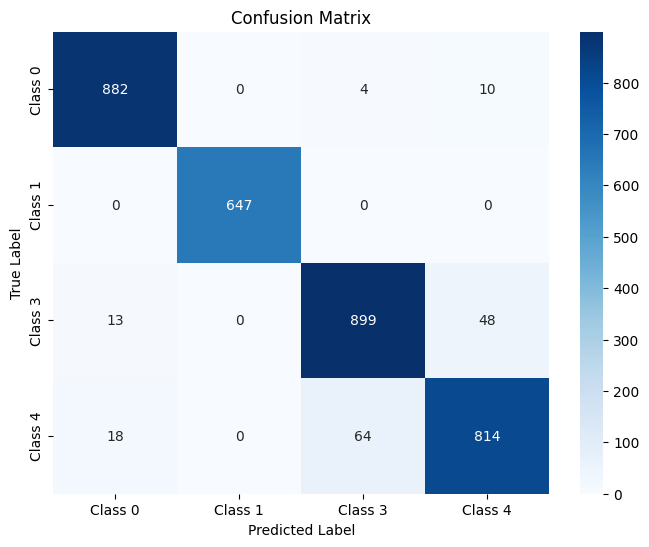

In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
conf_matrix = confusion_matrix(test_generator.classes, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=['Class 0', 'Class 1','Class 3','Class 4'], yticklabels=['Class 0', 'Class 1','Class 3','Class 4'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [34]:
# Compute confusion matrix
conf_matrix = confusion_matrix(test_generator.classes, predicted_labels)

# Extract TP (True Positives), TN (True Negatives), FP (False Positives), FN (False Negatives)
TP = conf_matrix[1, 1]  
TN = conf_matrix[0, 0]  
FP = conf_matrix[0, 1]  
FN = conf_matrix[1, 0]  

# Calculate the total number of correctly and incorrectly classified samples
correctly_classified = TP + TN
incorrectly_classified = FP + FN

print("Number of correctly classified samples:", correctly_classified)
print("Number of incorrectly classified samples:", incorrectly_classified)


Number of correctly classified samples: 1529

Number of incorrectly classified samples: 0


In [ ]:
import numpy as np

from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded=files.upload()

for fn in uploaded.keys():

  # predicting images
  path='/content/' + fn
  img=load_img(path, target_size=(150, 150))

  x=img_to_array(img)
  x /= 255
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)

  print(classes['AD'], classes['CN'], classes['EMCI'], classes['LMCI'])
